In [30]:
#Install all the Reqiuired Libraries and Packages 
import os
import glob
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc , logfbank
import librosa as lr
import os, glob, pickle
import librosa
from scipy import signal
import noisereduce as nr
from glob import glob
import librosa
#All the Required Packages and Libraies are installed.
import soundfile
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

f:\Softwares\Anaconda\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [5]:
#Loading the required custom DataSet 
os.listdir(path='F:/VS Code/Minor1_midsem/custom dataset') #Loading the Dataset
def getListOfFiles(dirName):
    listOfFile=os.listdir(dirName)
    allFiles=list()
    for entry in listOfFile:
        fullPath=os.path.join(dirName, entry)
        if os.path.isdir(fullPath):
            allFiles=allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles

dirName = './custom dataset'
listOfFiles = getListOfFiles(dirName)
len(listOfFiles)

10705

In [ ]:
#Use the Speech-Recognition API to get the Raw Text from Audio Files, Though Speech Recognition
#is less strong for large chunk of files , so used Error Handling , where when it is not be able to 
#produce the text of a particular Audio File it prints the statement 'error'.Just for understanding Audio
import speech_recognition as sr
r=sr.Recognizer()
for file in range(0 , len(listOfFiles) , 1):
    with sr.AudioFile(listOfFiles[file]) as source:
        audio = r.listen(source)
        try:
            text = r.recognize_google(audio)
            print(text)
        except:
            print('error')

is it talking by the door
dog sitting by the door
talk to Siri why the door
error
error
error
dog sitting by the door
change your talking by the door
kids talking by the door
dogs sitting by the door
sitting by the
kids talking by the door
talking by the door
dog sitting by the door
error
talking by the door
error
sitting by the door
error
kids talking by the door
khesa talking by the door
error
error
kids talking by the door
talking by the door
dogs sitting by the door
sitting by the door
talking by the door
is a talking by the door
the door
error
the door
Earth talking by the door
frogs are sitting by the door
dogs are sitting at the door
talking by the door
kids talking by the door
dogs sitting by the door
dogs sitting by the door
f****** by the door
is the talking to the door
Rockstar ceiling by the door
ceiling by the
error
khinch
sitting by the door
coronavirus
kids talking by the door
talking by the door
tour tour
exit the door
kids talking
kids talking by the door
dogs sitting 

In [ ]:
#Plotting the Basic Graphs for understanding of Audio Files :
for file in range(0 , len(listOfFiles) , 1):
    audio , sfreq = lr.load(listOfFiles[file])
    time = np.arange(0 , len(audio)) / sfreq
    
    fig ,ax = plt.subplots()
    ax.plot(time , audio)
    ax.set(xlabel = 'Time (s)' , ylabel = 'Sound Amplitude')
    plt.show()
    
#PLOT THE SEPCTOGRAM
for file in range(0 , len(listOfFiles) , 1):
     sample_rate , samples = wavfile.read(listOfFiles[file])
     frequencies , times, spectrogram = signal.spectrogram(samples, sample_rate) 
     plt.pcolormesh(times, frequencies, spectrogram)
     plt.imshow(spectrogram)
     plt.ylabel('Frequency [Hz]')
     plt.xlabel('Time [sec]')
     plt.show()

In [7]:
#Next Step is In-Depth Visualisation of Audio Fiels and its certain features to plot for.
#They are the Plotting Functions to be called later. 
def plot_signals(signals):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Time Series' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def plot_fft(fft):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transform' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            data = list(fft.values())[i]
            Y,freq = data[0] , data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq , Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
    
def plot_fbank(fbank):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i],cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1
            
def plot_mfccs(mfccs):
    fig , axes = plt.subplots(nrows=2, ncols=5,sharex =False , sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Capstrum  Coefficients' , size=16)
    i=0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i],
                             cmap='hot', interpolation = 'nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i +=1

def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n , d= 1/rate)
    Y= abs(np.fft.rfft(y)/n)
    return(Y,freq)

In [ ]:
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [ ]:
# Here The Data Set is loaded and plots are Visualised by Calling the Plotting Functions . 
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
for file in range(0 , len(listOfFiles) , 1):
    rate, data = wav.read(listOfFiles[file])
    fft_out = fft(data)
    %matplotlib inline
    plt.plot(data, np.abs(fft_out))
    plt.show()
    
signals={}
fft={}
fbank={}
mfccs={}
# load data
for file in range(0 , len(listOfFiles) , 1):
#     rate, data = wavfile.read(listOfFiles[file])
     signal,rate =librosa.load(listOfFiles[file] , sr=44100)
     mask = envelope(signal , rate , 0.0005)
     signals[file] = signal
     fft[file] = calc_fft(signal , rate)
    
     bank = logfbank(signal[:rate] , rate , nfilt = 26, nfft = 1103).T
     fbank[file] = bank
     mel = mfcc(signal[:rate] , rate , numcep =13 , nfilt = 26 , nfft=1103).T
     mfccs[file]=mel

plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

In [8]:
#Feature Extraction of Audio Files Function 
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [19]:
#Emotions in the RAVDESS dataset to be classified Audio Files based on . 
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#These are the emotions User wants to observe more :
observed_emotions=['sad', 'happy', 'fear', 'angry', 'disgust', 'neutral']
observed_emotions2=['SAD', 'HAP', 'FEA', 'ANG', 'DIS', 'NEU']

In [20]:
#Load the data and extract features for each sound file
import os
import glob
def load_data(test_size=0.25):
    x,y=[],[]
    answer = 0
    for file in glob.glob(r'F:\VS Code\Minor1_midsem\custom dataset\\**\\*.wav'):
        file_name=os.path.basename(file)
        emo=file.split("\\")[4]
        emotion=emo.split(".")[0]
        if emotion not in observed_emotions:
            answer += 1
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append([emotion,file_name])
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [21]:
#Split the dataset
import librosa
import numpy as np
x_train,x_test,y_train,y_test=load_data(test_size=0.25)
print(np.shape(x_train),np.shape(x_test), np.shape(y_train),np.shape(y_test))
y_test_map = np.array(y_test).T
y_test = y_test_map[0]
test_filename = y_test_map[1]
y_train_map = np.array(y_train).T
y_train = y_train_map[0]
train_filename = y_train_map[1]
print(np.shape(y_train),np.shape(y_test))
print(*test_filename,sep="\n")

C:\Users\dell\AppData\Local\Temp\ipykernel_11100\2946855648.py:17: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 2.1362305e-04 1.2207031e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\dell\AppData\Local\Temp\ipykernel_11100\2946855648.py:17: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.3569336e-04
 -3.0517578e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\dell\AppData\Local\Temp\ipykernel_11100\2946855648.py:17: FutureWarning: Pass y=[ 3.0517578e-05  9.1552734e-05  6.1035156e-05 ...  7.6293945e-04
  5.1879883e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.

(8028, 180) (2677, 180) (8028, 2) (2677, 2)
(8028,) (2677,)
1005_IOM_SAD_XX.wav
1065_IOM_DIS_XX.wav
1089_IWW_ANG_XX.wav
YAF_bath_angry.wav
03-01-01-01-02-02-08.wav
YAF_judge_fear.wav
1006_IEO_SAD_MD.wav
1003_TAI_DIS_XX.wav
OAF_pad_fear.wav
YAF_voice_sad.wav
1063_MTI_DIS_XX.wav
YAF_shawl_neutral.wav
1075_IEO_FEA_HI.wav
1005_IWW_DIS_XX.wav
03-01-03-02-02-01-22.wav
OAF_get_sad.wav
1028_WSI_HAP_XX.wav
1037_IEO_FEA_MD.wav
1048_IOM_NEU_XX.wav
03-01-01-01-01-01-12.wav
1079_IWW_FEA_XX.wav
03-01-03-01-02-01-13.wav
1026_DFA_FEA_XX.wav
1016_IWL_HAP_XX.wav
YAF_base_disgust.wav
1091_ITS_DIS_XX.wav
1072_IOM_HAP_XX.wav
1020_TAI_HAP_XX.wav
1028_ITH_ANG_XX.wav
1050_ITS_ANG_XX.wav
1044_IWW_SAD_XX.wav
1058_IEO_ANG_HI.wav
1086_IOM_ANG_XX.wav
OAF_dead_neutral.wav
YAF_dime_fear.wav
YAF_shawl_angry.wav
1058_MTI_FEA_XX.wav
1011_ITS_NEU_XX.wav
1071_IWL_NEU_XX.wav
1080_TSI_HAP_XX.wav
OAF_sell_fear.wav
1019_IWL_SAD_XX.wav
1039_ITS_SAD_XX.wav
1012_MTI_FEA_XX.wav
YAF_fail_fear.wav
1050_IWL_DIS_XX.wav
1036_IEO_FEA_

In [22]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))
print((x_train[0], x_test[0]))
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

(8028, 2677)
(array([-3.50448578e+02,  1.11445877e+02,  4.57209930e+01,  2.49704018e+01,
       -8.15295756e-01,  1.34920478e+00, -9.97780323e-01, -1.53437281e+01,
       -4.18055058e+00, -3.79778695e+00, -2.16524124e+00, -2.67350316e+00,
       -4.53803253e+00, -4.52964830e+00, -2.86659622e+00, -5.71328306e+00,
       -3.41829944e+00, -2.15911698e+00, -6.22398281e+00, -1.33625793e+00,
       -3.61905837e+00, -4.01502228e+00, -4.72698808e-01, -6.79098547e-01,
       -2.71196216e-01,  7.94296563e-02, -4.01374876e-01, -2.07575178e+00,
       -2.25012469e+00,  4.80165339e+00,  5.82467985e+00,  5.62708998e+00,
        7.32681513e+00,  3.03307605e+00,  5.94931901e-01,  1.37596643e+00,
       -9.89756763e-01,  4.29325581e-01, -2.38487661e-01, -3.87438774e-01,
        5.16972005e-01,  5.89548051e-01,  5.41188300e-01,  5.47800720e-01,
        5.25205255e-01,  5.03197193e-01,  6.18449032e-01,  6.56591475e-01,
        6.49084508e-01,  6.41664028e-01,  5.96700788e-01,  4.76679474e-01,
        6.1

In [23]:

# Initialize the Multi Layer Perceptron Classifie
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [24]:
#Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [25]:

#SAVING THE MODEL
import pickle
# Save the Modle to file in the current working directory
#For any new testing data other than the data in dataset

Pkl_Filename = "F:/VS Code/Minor1_midsem/Speech_Emotion_Recognition.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [26]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Speech_Emotion_Recognition = pickle.load(file)

Speech_Emotion_Recognition

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [27]:
#predicting :
y_pred=Speech_Emotion_Recognition.predict(x_test)
y_pred

array(['sad', 'neutral', 'angry', ..., 'happy', 'disgust', 'sad'],
      dtype='<U7')

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[283  35  35 105   1   5]
 [ 14 245  59  91   6  53]
 [ 15  18 251  57   3  51]
 [ 30  28  57 323   8  16]
 [  1  59  34  75 138  74]
 [  0  27  99  37  12 332]]
Accuracy Score : 0.5872245050429585
Report : 
              precision    recall  f1-score   support

       angry       0.83      0.61      0.70       464
     disgust       0.59      0.52      0.56       468
        fear       0.47      0.64      0.54       395
       happy       0.47      0.70      0.56       462
     neutral       0.82      0.36      0.50       381
         sad       0.63      0.65      0.64       507

    accuracy                           0.59      2677
   macro avg       0.63      0.58      0.58      2677
weighted avg       0.63      0.59      0.59      2677



In [29]:
#Store the Prediction probabilities into CSV file 
import numpy as np
import pandas as pd
y_pred1 = pd.DataFrame(y_pred, columns=['predictions'])
y_pred1['file_names'] = test_filename
print(y_pred1)
y_pred1.to_csv('custom_prediction.csv')

     predictions                file_names
0            sad       1005_IOM_SAD_XX.wav
1        neutral       1065_IOM_DIS_XX.wav
2          angry       1089_IWW_ANG_XX.wav
3          angry        YAF_bath_angry.wav
4        disgust  03-01-01-01-02-02-08.wav
...          ...                       ...
2672         sad       1020_ITS_SAD_XX.wav
2673        fear        YAF_shawl_fear.wav
2674       happy  03-01-03-02-02-02-23.wav
2675     disgust       1003_TIE_HAP_XX.wav
2676         sad       1024_IEO_FEA_LO.wav

[2677 rows x 2 columns]


In [ ]:
#RECORDED USING MICROPHONE:
import pyaudio
import wave

CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "output1.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


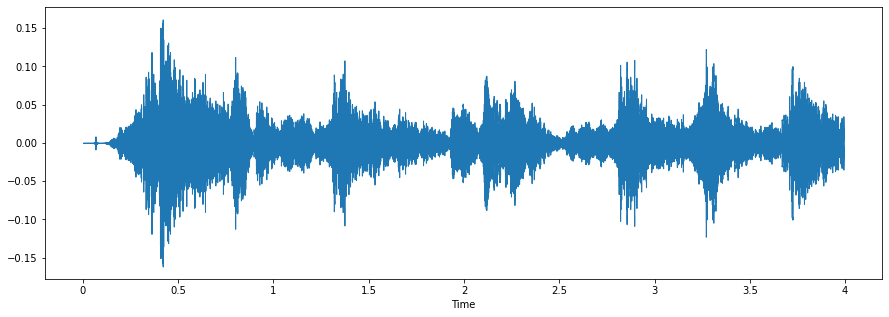

In [ ]:
#The file 'output10.wav' in the next cell is the file that was recorded live using the code :
data, sampling_rate = librosa.load('output1.wav')
%matplotlib inline
import os
import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [ ]:
def envelope(y , rate, threshold):
    mask=[]
    y=pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10) ,  min_periods=1 , center = True).mean()
    for mean in y_mean:
        if mean>threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [ ]:
## Appying extract_feature function on random file and then loading model to predict the result 
file = 'F:/VS Code/Minor1_midsem/output1.wav'
signal , rate = librosa.load(file, sr=16000)
mask = envelope(signal,rate, 0.0005)
wavfile.write(filename= r'F:\VS Code\Minor1_midsem\cleaned2.wav', rate=rate,data=signal[mask])


In [33]:
file1 = 'F:/VS Code/Minor1_midsem/cleaned.wav'
'''data , sr = librosa.load(file1)
data = np.array(data)'''
ans =[]
new_feature = extract_feature(file1, mfcc=True, chroma=True, mel=True)
ans.append(new_feature)
ans = np.array(ans)
# data.shape

Speech_Emotion_Recognition.predict(ans)

C:\Users\dell\AppData\Local\Temp\ipykernel_11100\2946855648.py:17: FutureWarning: Pass y=[-3.8703398e-05 -3.6789566e-05 -2.5378515e-05 ...  4.3817732e-02
  7.6810025e-02  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


array(['happy'], dtype='<U7')

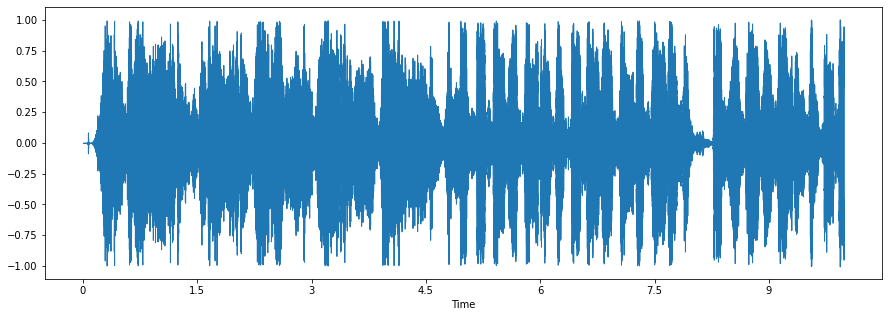

In [31]:
#The file 'output10.wav' in the next cell is the file that was recorded live using the code :
data, sampling_rate = librosa.load('F:\VS Code\Minor1_midsem\self recorded\output1.wav')
%matplotlib inline
import os
import pandas as pd
import librosa.display
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)